In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

from sklearn.model_selection import train_test_split


from hmmlearn import hmm

np.random.seed(46)

In [2]:
#Read EEG dataset
from os import listdir
# Z: normal but with eyes open
datapath_Z = 'dataset/EEG/Z' 
# O: normal but with eyes closed
datapath_O = 'dataset/EEG/O'
# S: ictal state and contains seizure activities
datapath_S = 'dataset/EEG/S'
# N: hippocampal formation of the opposite brain hemisphere
datapath_N = 'dataset/EEG/N'
# F: epileptogenic zone
datapath_F = 'dataset/EEG/F'

files_Z = [f for f in listdir(datapath_Z)]
files_O = [f for f in listdir(datapath_O)]
files_S = [f for f in listdir(datapath_S)]
files_N = [f for f in listdir(datapath_N)]
files_F = [f for f in listdir(datapath_F)]

Z_train, Z_test = train_test_split(
    files_Z, test_size = 0.3)

S_train, S_test = train_test_split(
    files_S, test_size = 0.3)

data_Z_train = np.loadtxt(datapath_Z + '/' + Z_train[0])
data_Z_train_len = [len(data_Z_train)]
for file in Z_train:
    data_file = np.loadtxt(datapath_Z + '/' + file)
    data_Z_train = np.concatenate([data_Z_train, data_file])
    data_Z_train_len.append(len(data_file))

data_Z_test = np.loadtxt(datapath_Z + '/' + Z_test[0])
data_Z_test_len = [len(data_Z_test)]
for file in Z_test:
    data_file = np.loadtxt(datapath_Z + '/' + file)
    data_Z_test = np.concatenate([data_Z_test, data_file])
    data_Z_test_len.append(len(data_file))
    
data_S_test = np.loadtxt(datapath_S + '/' + S_test[0])
data_S_test_len = [len(data_S_test)]
for file in S_test:
    data_file = np.loadtxt(datapath_S + '/' + file)
    data_S_test = np.concatenate([data_S_test, data_file])
    data_S_test_len.append(len(data_file))

#test_data = np.concatenate([data_Z_test, data_S_test])
#test_data_len = np.concatenate([data_Z_test_len, data_S_test_len])

In [3]:
#train hmm for EEG dataset 
EEG_HMM = hmm.GMMHMM(n_components=4, n_mix=10, covariance_type='diag')
EEG_HMM.fit(data_Z_train.reshape(-1,1), lengths = data_Z_train_len)

GMMHMM(covars_prior=array([[[-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5]],

       [[-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5]],

       [[-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5]],

       [[-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5]]]),
       covars_weight=array([[[0.],
        [0.],
        [...
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]]),
       means_weight=array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0

In [4]:
score_Z = []
score_S = []
for i in range(len(Z_test)):
    data = data_Z_test[i*data_Z_test_len[i]:(i + 1)*data_Z_test_len[i]]
    score_Z.append(EEG_HMM.score(data.reshape(-1, 1)))
    # print(EGG_HMM.score(data.reshape(-1, 1)))
#print("---------------")
for i in range(len(S_test)):
    data = data_S_test[i*data_S_test_len[i]:(i + 1)*data_S_test_len[i]]
    score_S.append(EEG_HMM.score(data.reshape(-1, 1)))
    # print(EGG_HMM.score(data.reshape(-1, 1)))

<function matplotlib.pyplot.show(close=None, block=None)>

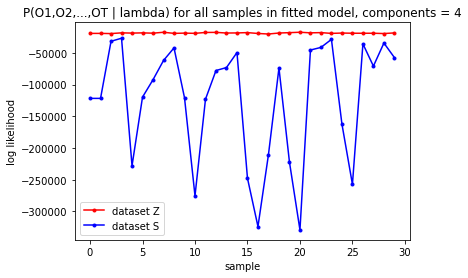

In [5]:
plt.plot(score_Z[:], ".-", label="dataset Z", color = 'r')
plt.plot(score_S[:], ".-", label="dataset S", color = 'b')
plt.xlabel("sample")
plt.ylabel("log likelihood")
#plt.yscale("symlog")
plt.title("P(O1,O2,...,OT | lambda) for all samples in fitted model, components = 4")
plt.legend()
plt.show

In [3]:
# Read ECG dataset
# take normal sinus rhythm (NSR) and Atrial fibrillation (AFib) as example
from os import listdir
datapath_NSR = 'dataset/MLII/1 NSR' 
datapath_AFib = 'dataset/MLII/4 AFIB'
# Premature ventricular contraction
datapath_PVC = 'dataset/MLII/7 PVC'

files_NSR = [f for f in listdir(datapath_NSR)]
files_AFib = [f for f in listdir(datapath_AFib)]
files_PVC = [f for f in listdir(datapath_PVC)]

NSR_train, NSR_test = train_test_split(
    files_NSR, test_size = 0.3)

AFib_train, AFib_test = train_test_split(
    files_AFib, test_size = 0.3)

PVC_train, PVC_test = train_test_split(
    files_PVC, test_size = 0.3)

data_NSR_train = sio.loadmat(datapath_NSR + '/' + NSR_train[0])['val'][0]
data_NSR_train_len = [len(data_NSR_train)]

for file in NSR_train:
    data_file = sio.loadmat(datapath_NSR + '/' + file)['val'][0]
    data_NSR_train = np.concatenate([data_NSR_train, data_file])
    data_NSR_train_len.append(len(data_file))

data_NSR_test = sio.loadmat(datapath_NSR + '/' + NSR_test[0])['val'][0]
data_NSR_test_len = [len(data_NSR_test)]
for file in NSR_test:
    data_file = sio.loadmat(datapath_NSR + '/' + file)['val'][0]
    data_NSR_test = np.concatenate([data_NSR_test, data_file])
    data_NSR_test_len.append(len(data_file))
    
data_AFib_test = sio.loadmat(datapath_AFib + '/' + AFib_test[0])['val'][0]
data_AFib_test_len = [len(data_AFib_test)]
for file in AFib_test:
    data_file = sio.loadmat(datapath_AFib + '/' + file)['val'][0]
    data_AFib_test = np.concatenate([data_AFib_test, data_file])
    data_AFib_test_len.append(len(data_file))

data_PVC_test = sio.loadmat(datapath_PVC + '/' + PVC_test[0])['val'][0]
data_PVC_test_len = [len(data_PVC_test)]
for file in PVC_test:
    data_file = sio.loadmat(datapath_PVC + '/' + file)['val'][0]
    data_PVC_test = np.concatenate([data_PVC_test, data_file])
    data_PVC_test_len.append(len(data_file))
#test_data = np.concatenate([data_NSR_test, data_AFib_test])
#test_data_len = np.concatenate([data_NSR_test_len, data_AFib_test_len])

In [4]:
#train hmm for ECG dataset 
ECG_HMM = hmm.GMMHMM(n_components=4, n_mix=2, covariance_type='full', n_iter=10, init_params='smcw')
ECG_HMM.transmat_ = np.array([[0.5, 0.5, 0, 0],
                              [0, 0.5, 0.5, 0],
                              [0, 0, 0.5, 0.5],
                              [0.5, 0, 0, 0.5]])
ECG_HMM.fit(data_NSR_train.reshape(-1,1), lengths = data_NSR_train_len)

GMMHMM(covariance_type='full',
       covars_prior=array([[[[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]]]]),
       covars_weight=array([[-3., -3.],
       [-3., -3.],
       [-3., -3.],
       [-3., -3.]]),
       init_params='smcw',
       means_prior=array([[[0.],
        [0.]],

       [[0.],
        [0.]],

       [[0.],
        [0.]],

       [[0.],
        [0.]]]),
       means_weight=array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]]),
       n_components=4, n_mix=2,
       weights_prior=array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]]))

In [5]:
score_NSR = []
score_AFib = []
score_PVC = []
for i in range(len(NSR_test)):
    data = data_NSR_test[i*data_NSR_test_len[i]:(i + 1)*data_NSR_test_len[i]]
    score_NSR.append(ECG_HMM.score(data.reshape(-1, 1)))
    #print(ECG_HMM.score(data.reshape(-1, 1)))
#print("---------------")
for i in range(len(AFib_test)):
    data = data_AFib_test[i*data_AFib_test_len[i]:(i + 1)*data_AFib_test_len[i]]
    score_AFib.append(ECG_HMM.score(data.reshape(-1, 1)))
    #print(ECG_HMM.score(data.reshape(-1, 1)))
for i in range(len(PVC_test)):
    data = data_PVC_test[i*data_PVC_test_len[i]:(i + 1)*data_PVC_test_len[i]]
    score_PVC.append(ECG_HMM.score(data.reshape(-1, 1)))
    #print(ECG_HMM.score(data.reshape(-1, 1)))

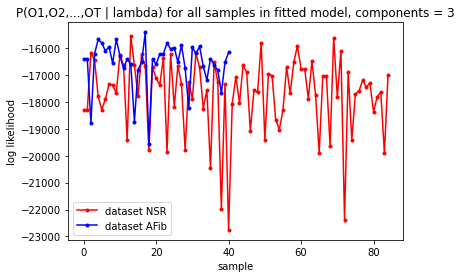

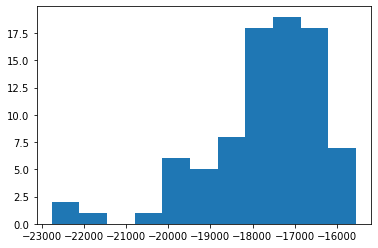

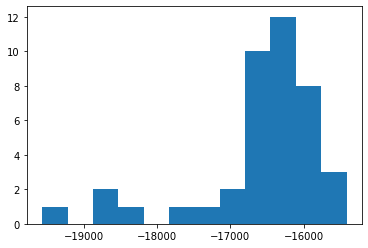

In [8]:
plt.plot(score_NSR[:], ".-", label="dataset NSR", color = 'r')
plt.plot(score_AFib[:], ".-", label="dataset AFib", color = 'b')
# plt.plot(score_PVC[:], ".-", label="dataset PVC", color = 'm')
plt.xlabel("sample")
plt.ylabel("log likelihood")
#plt.yscale("symlog")
plt.title("P(O1,O2,...,OT | lambda) for all samples in fitted model, components = 3")
plt.legend()
plt.show()

_ = plt.hist(score_NSR[:], bins = 'auto')
plt.show()
_ = plt.hist(score_AFib[:], bins = 'auto')
plt.show()

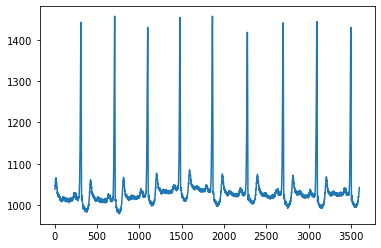

In [108]:
i = len(NSR_train)
data_plt = data_NSR_train[i * data_NSR_train_len[i] : (i + 1) * data_NSR_train_len[0]]
plt.plot(data_plt)
plt.show()

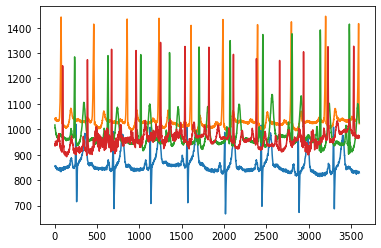

In [49]:
i = 39
data_plt = data_NSR_test[i * data_NSR_test_len[i] : (i + 1) * data_NSR_train_len[0]]
plt.plot(data_plt)
i = 15
data_plt = data_NSR_test[i * data_NSR_test_len[i] : (i + 1) * data_NSR_train_len[0]]
plt.plot(data_plt)
i = 14
data_plt = data_NSR_test[i * data_NSR_test_len[i] : (i + 1) * data_NSR_train_len[0]]
plt.plot(data_plt)
i = 19
data_plt = data_NSR_test[i * data_NSR_test_len[i] : (i + 1) * data_NSR_train_len[0]]
plt.plot(data_plt)
plt.show()

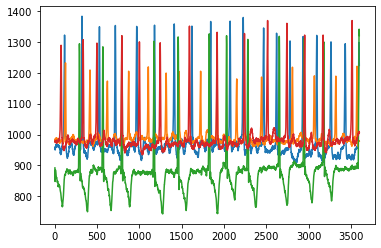

In [51]:
i = 39
data_plt = data_AFib_test[i * data_AFib_test_len[i] : (i + 1) * data_AFib_test_len[0]]
plt.plot(data_plt)
i = 15
data_plt = data_AFib_test[i * data_AFib_test_len[i] : (i + 1) * data_AFib_test_len[0]]
plt.plot(data_plt)
i = 14
data_plt = data_AFib_test[i * data_AFib_test_len[i] : (i + 1) * data_AFib_test_len[0]]
plt.plot(data_plt)
i = 19
data_plt = data_AFib_test[i * data_AFib_test_len[i] : (i + 1) * data_AFib_test_len[0]]
plt.plot(data_plt)
plt.show()

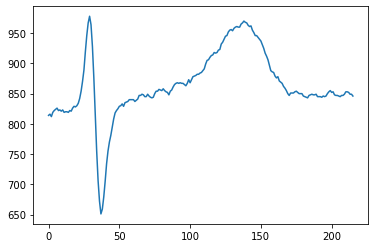

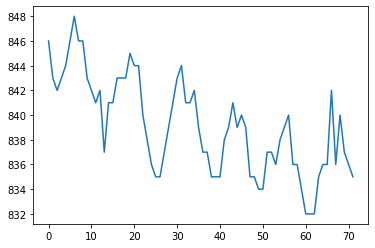

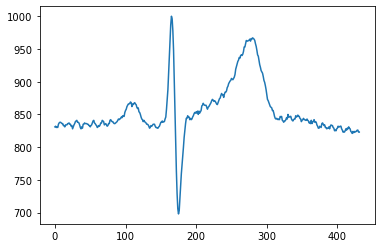

In [70]:
i = 41
data_plt = data_NSR_test[int((i) * data_NSR_test_len[i]) : int((i + 0.06) * data_NSR_train_len[0])]
plt.plot(data_plt)
plt.show()
data_plt = data_NSR_test[int((i + 0.06) * data_NSR_test_len[i]) : int((i + 0.08) * data_NSR_train_len[0])]
plt.plot(data_plt)
plt.show()
data_plt = data_NSR_test[int((i + 0.08) * data_NSR_test_len[i]) : int((i + 0.2) * data_NSR_train_len[0])]
plt.plot(data_plt)
plt.show()

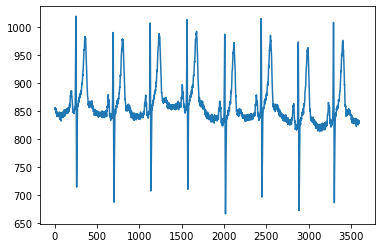

843


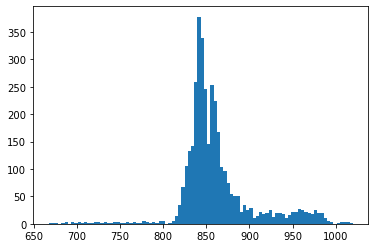

In [76]:
i = 39
data_plt = data_NSR_test[i * data_AFib_test_len[i] : (i + 1) * data_AFib_test_len[0]]
plt.plot(data_plt)
plt.show()
data = data_NSR_test[i * data_NSR_test_len[i] : (i + 1) * data_NSR_train_len[0]]
counts = np.bincount(data)
print(np.argmax(counts))
_ = plt.hist(data_plt, bins = 'auto')
plt.show()

In [142]:
# 归一化
import copy
NSR_train_reduced = copy.deepcopy(data_NSR_train)
for i in range(len(NSR_train) + 1):
    data = NSR_train_reduced[i * data_NSR_train_len[i] : (i + 1) * data_NSR_train_len[0]]
    counts = np.bincount(data)
    std_point = np.argmax(counts)
    for j in range(len(data)):
        start_id = i * data_NSR_train_len[0]
        NSR_train_reduced[start_id + j] = NSR_train_reduced[start_id + j] - std_point

NSR_test_reduced = copy.deepcopy(data_NSR_test)
for i in range(len(NSR_test) + 1):
    data = NSR_test_reduced[i * data_NSR_train_len[i] : (i + 1) * data_NSR_train_len[0]]
    counts = np.bincount(data)
    std_point = np.argmax(counts)
    for j in range(len(data)):
        start_id = i * data_NSR_train_len[0]
        NSR_test_reduced[start_id + j] = NSR_test_reduced[start_id + j] - std_point
        
AFib_test_reduced = copy.deepcopy(data_AFib_test)
for i in range(len(AFib_test) + 1):
    data = AFib_test_reduced[i * data_NSR_train_len[i] : (i + 1) * data_NSR_train_len[0]]
    counts = np.bincount(data)
    std_point = np.argmax(counts)
    for j in range(len(data)):
        start_id = i * data_NSR_train_len[0]
        AFib_test_reduced[start_id + j] = AFib_test_reduced[start_id + j] - std_point
        
PVC_test_reduced = copy.deepcopy(data_PVC_test)
for i in range(len(PVC_test) + 1):
    data = PVC_test_reduced[i * data_NSR_train_len[i] : (i + 1) * data_NSR_train_len[0]]
    counts = np.bincount(data)
    std_point = np.argmax(counts)
    for j in range(len(data)):
        start_id = i * data_NSR_train_len[0]
        PVC_test_reduced[start_id + j] = PVC_test_reduced[start_id + j] - std_point

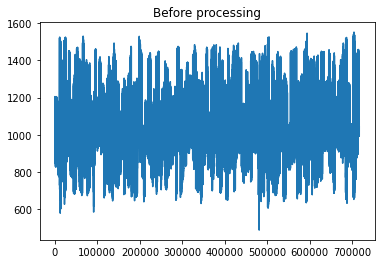

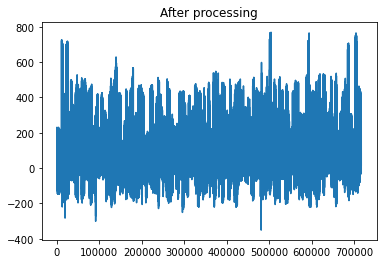

In [159]:
plt.plot(data_NSR_train)
plt.title("Before processing")
plt.show()
plt.plot(NSR_train_reduced)
plt.title("After processing")
plt.show()

63.35297326813936
39.56926053835817
61.21661682785782
70.04960446791338


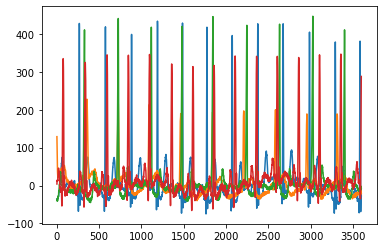

In [158]:
i = 39
data_plt = NSR_train_reduced[i * data_AFib_test_len[i] : (i + 1) * data_AFib_test_len[0]]
print(data_plt.std())
plt.plot(data_plt)
i = 15
data_plt = NSR_train_reduced[i * data_AFib_test_len[i] : (i + 1) * data_AFib_test_len[0]]
plt.plot(data_plt)
print(data_plt.std())
i = 14
data_plt = NSR_train_reduced[i * data_AFib_test_len[i] : (i + 1) * data_AFib_test_len[0]]
data_plt.std()
print(data_plt.std())
plt.plot(data_plt)
i = 19
data_plt = NSR_train_reduced[i * data_AFib_test_len[i] : (i + 1) * data_AFib_test_len[0]]
print(data_plt.std())
plt.plot(data_plt)
plt.show()

In [134]:
#train hmm for ECG dataset 
model = hmm.GaussianHMM(n_components = 2, covariance_type = "full")
ECG_HMM_r = hmm.GMMHMM(n_components=4, n_mix=2, covariance_type='full', n_iter=10, init_params='smcw')
ECG_HMM_r.transmat_ = np.array([[0.5, 0.5, 0, 0],
                              [0, 0.5, 0.5, 0],
                              [0, 0, 0.5, 0.5],
                              [0.5, 0, 0, 0.5]])
ECG_HMM_r.fit(NSR_train_reduced.reshape(-1,1), lengths = data_NSR_train_len)

GMMHMM(covariance_type='full',
       covars_prior=array([[[[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]]]]),
       covars_weight=array([[-3., -3.],
       [-3., -3.],
       [-3., -3.],
       [-3., -3.]]),
       init_params='smcw',
       means_prior=array([[[0.],
        [0.]],

       [[0.],
        [0.]],

       [[0.],
        [0.]],

       [[0.],
        [0.]]]),
       means_weight=array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]]),
       n_components=4, n_mix=2,
       weights_prior=array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]]))

In [147]:
score_NSR = []
score_AFib = []
score_PVC = []
for i in range(len(NSR_test) + 1):
    data = NSR_test_reduced[i * data_NSR_test_len[i]:(i + 1) * data_NSR_test_len[i]]
    score_NSR.append(ECG_HMM_r.score(data.reshape(-1, 1)))
    #print(ECG_HMM.score(data.reshape(-1, 1)))
#print("---------------")
for i in range(len(AFib_test) + 1):
    data = AFib_test_reduced[i * data_AFib_test_len[i]:(i + 1) * data_AFib_test_len[i]]
    score_AFib.append(ECG_HMM_r.score(data.reshape(-1, 1)))
    #print(ECG_HMM.score(data.reshape(-1, 1)))
for i in range(len(PVC_test) + 1):
    data = PVC_test_reduced[i * data_PVC_test_len[i]:(i + 1) * data_PVC_test_len[i]]
    score_PVC.append(ECG_HMM_r.score(data.reshape(-1, 1)))
    #print(ECG_HMM.score(data.reshape(-1, 1)))

<function matplotlib.pyplot.show(close=None, block=None)>

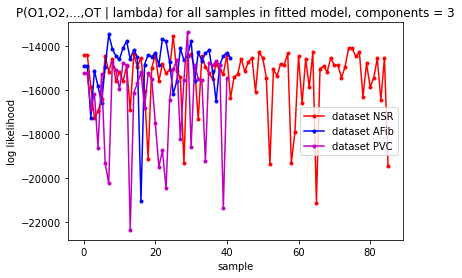

In [148]:
plt.plot(score_NSR[:], ".-", label="dataset NSR", color = 'r')
plt.plot(score_AFib[:], ".-", label="dataset AFib", color = 'b')
plt.plot(score_PVC[:], ".-", label="dataset PVC", color = 'm')
plt.xlabel("sample")
plt.ylabel("log likelihood")
#plt.yscale("symlog")
plt.title("P(O1,O2,...,OT | lambda) for all samples in fitted model, components = 3")
plt.legend()
plt.show

65.52037184360957